In [1]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

In [2]:
data_dir = pathlib.Path('./Image_Data')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

33000

In [3]:
# CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != ".ipynb_checkpoints"])
# CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if (item.name == "Turkish" or item.name == "Dutch" or item.name == "Swedish")])
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if (item.name == "Turkish" or item.name == "Dutch" or item.name == "Swedish" or item.name == "Persian" or item.name == "Mongolian")])
CLASS_NAMES
list(CLASS_NAMES)

['Turkish', 'Dutch', 'Swedish', 'Mongolian', 'Persian']

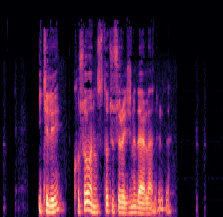

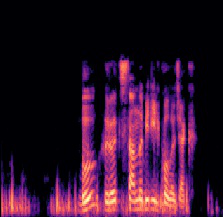

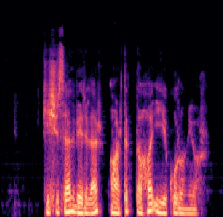

In [4]:
Turkish = list(data_dir.glob('Turkish/*'))

for image_path in Turkish[:3]:
    display.display(Image.open(str(image_path)))

In [5]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [6]:
BATCH_SIZE = 32
IMG_HEIGHT = 200
IMG_WIDTH = 200
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [18]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data_gen = image_generator.flow_from_directory(directory='./Image_Data_Test',
                                                     batch_size=32,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 15000 images belonging to 5 classes.
Found 1875 images belonging to 5 classes.


In [8]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

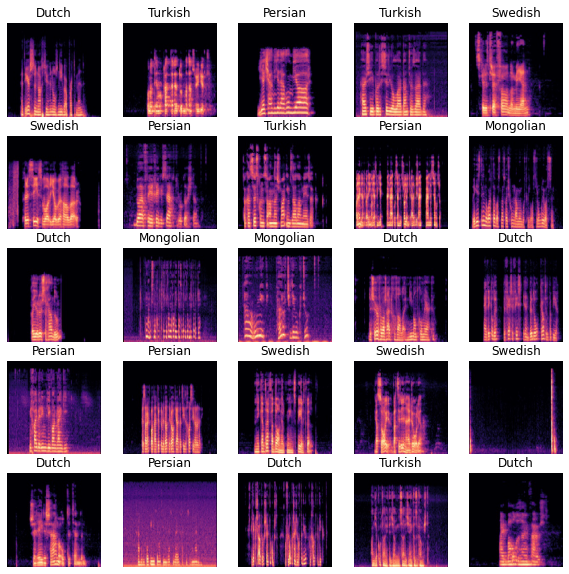

In [9]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
import pickle
from keras.models import model_from_json
from keras.models import load_model

Using TensorFlow backend.


In [11]:
image_batch, label_batch = next(train_data_gen)
image_batch[0]

array([[[0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        ...,
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628]],

       [[0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        ...,
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628]],

       [[0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        ...,
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628],
        [0.        , 0.        , 0.01568628]],

       ...,

       [[0.        , 0.01960784, 0.01960784],
        [0.12941177, 0.        , 0.10588236],
        [0.6509804 , 0

In [30]:
# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = (200,200,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Dense(len(CLASS_NAMES)))
model.add(Activation("softmax"))


In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(200,200,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(len(CLASS_NAMES), activation='softmax'))

In [11]:
# Construct model 
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(200,200,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(len(CLASS_NAMES), activation='softmax'))

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, kernel_regularizer=l2(weight_decay), 
                 input_shape=(200,200,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.50))

model.add(Conv2D(filters=256, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.55))

model.add(Conv2D(filters=512, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.60))

model.add(Flatten())

model.add(Dense(1024, kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))

model.add(Dense(len(CLASS_NAMES), activation='softmax'))

In [26]:
from tensorflow.keras.regularizers import l2

weight_decay = 0.001

# Construct model 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, kernel_regularizer=l2(weight_decay), input_shape=(200,200,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.20))

model.add(Conv2D(filters=64, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.20))

model.add(Conv2D(filters=128, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.50))

model.add(Conv2D(filters=256, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.55))

model.add(Conv2D(filters=512, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.60))

# model.add(Conv2D(filters=512, kernel_size=2, kernel_regularizer=l2(weight_decay), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.2))
# model.add(GlobalAveragePooling2D())
model.add(Flatten())

model.add(Dense(1024, kernel_regularizer=l2(weight_decay)))
model.add(Activation("relu"))

# model.add(Dense(512, kernel_regularizer=l2(weight_decay)))
# model.add(Activation("relu"))

# model.add(Dense(64))
# model.add(Activation("relu"))

model.add(Dense(len(CLASS_NAMES), activation='softmax'))

In [29]:
# from tensorflow.keras.regularizers import l2

# weight_decay = 0.001

# model = Sequential()

# model.add(Conv2D(64, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu", input_shape=(200,200,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(128, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(256, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(256, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(512, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(512, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(512, 3, 3, kernel_regularizer=l2(weight_decay), activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Flatten())
# model.add(Dense(1024, kernel_regularizer=l2(weight_decay), activation="relu"))

# model.add(Dense(len(CLASS_NAMES), activation="softmax"))

In [27]:
# Compiling the model using some basic parameters
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [28]:
# history = model.fit(train_data_gen, epochs=25)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5)
# history = model.fit(train_data_gen, epochs=50, validation_data=test_data_gen, callbacks=[callback])
history = model.fit(train_data_gen, epochs=50, validation_data=test_data_gen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 469 steps, validate for 59 steps
Epoch 1/50
469/469 [==============================] - 64s 137ms/step - loss: 3.7975 - accuracy: 0.4896 - val_loss: 4.0669 - val_accuracy: 0.2667
Epoch 2/50
469/469 [==============================] - 63s 134ms/step - loss: 2.1459 - accuracy: 0.6068 - val_loss: 2.4602 - val_accuracy: 0.4821
Epoch 3/50
469/469 [==============================] - 63s 134ms/step - loss: 1.8880 - accuracy: 0.6531 - val_loss: 1.8671 - val_accuracy: 0.6859
Epoch 4/50
469/469 [==============================] - 63s 134ms/step - loss: 1.9800 - accuracy: 0.6819 - val_loss: 2.6083 - val_accuracy: 0.4955
Epoch 5/50
469/469 [==============================] - 63s 133ms/step - loss: 1.8139 - accuracy: 0.7083 - val_loss: 2.0631 - val_accuracy: 0.6603
Epoch 6/50
469/469 [==============================] - 63s 133ms/step - loss: 1.7861 - accuracy: 0.7237 - val_loss: 1.9835 - val_accuracy: 0.6656
Epoch 7/50
469/469 [=================

In [ ]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

Saved model to disk
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


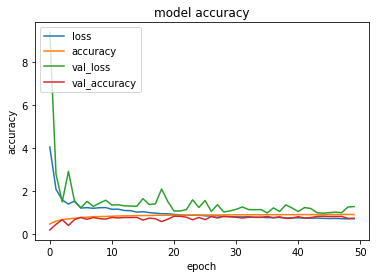

In [19]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy', 'val_loss', 'val_accuracy'], loc='upper left')

In [38]:
image_batch, label_batch = next(train_data_gen)
image_batch[0].shape
label_batch[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [39]:
predictions = model.predict(image_batch[0])

ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (200, 200, 3)

In [72]:
loss, acc = model.evaluate(test_data_gen)  # returns loss and metrics
print("loss: %.2f" % loss)
print("acc: %.2f" % acc)

  ...
    to  
  ['...']
59/59 [==============================] - 4s 70ms/step - loss: 1.3533 - accuracy: 0.6315
loss: 1.35
acc: 0.63


In [51]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_data_gen, 1875 // 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print(len(Y_pred),len(y_pred))
print('Confusion Matrix')
print(confusion_matrix(test_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['Turkish', 'Dutch', 'Swedish', 'Mongolian', 'Persian']
print(classification_report(test_data_gen.classes, y_pred, target_names=target_names))

1875 1875
Confusion Matrix
[[ 58  40  63  97 117]
 [ 57  40  71  85 122]
 [ 53  42  66  95 119]
 [ 62  33  58  89 133]
 [ 65  39  81  79 111]]
Classification Report
              precision    recall  f1-score   support

     Turkish       0.20      0.15      0.17       375
       Dutch       0.21      0.11      0.14       375
     Swedish       0.19      0.18      0.18       375
   Mongolian       0.20      0.24      0.22       375
     Persian       0.18      0.30      0.23       375

    accuracy                           0.19      1875
   macro avg       0.20      0.19      0.19      1875
weighted avg       0.20      0.19      0.19      1875



In [63]:
print(len(test_data_gen.classes))
count = 0
for truthValue in y_pred == test_data_gen.classes:
    if truthValue == True:
        count += 1
        
print(count/1875)

1875
0.18293333333333334


In [21]:
history = model.fit(train_data_gen, epochs=1)

  ...
    to  
  ['...']
Train for 141 steps
141/141 [==============================] - 37s 266ms/step - loss: 0.2677 - accuracy: 0.8967
